In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition

In [5]:
df = pd.read_csv("data/hygdata_v3-abridged.csv", sep=',', usecols=['ci','lum'])
df.dropna(inplace=True)
print(df.columns)
df

Index(['ci', 'lum'], dtype='object')


,ci,lum
76189,1.200,91.790979
107312,0.884,14.736692
62985,0.753,2.412126
114671,1.077,23.507151
51601,1.450,173.300574
...,...,...
119603,1.500,0.002946
119607,1.540,0.003436
119610,1.870,0.000088
119611,1.640,0.002224


In [9]:
ci = df['ci'].values
lum = df['lum'].values
iii = lum > 0
lum = lum[iii]
ci = ci[iii]
lum = np.log(lum)
# T = np.log(4600 * (10.92/(ci+1.7)+10.92/(ci+0.62)))
# X0 = np.c_[lum,T]
X0 = np.c_[lum,ci]

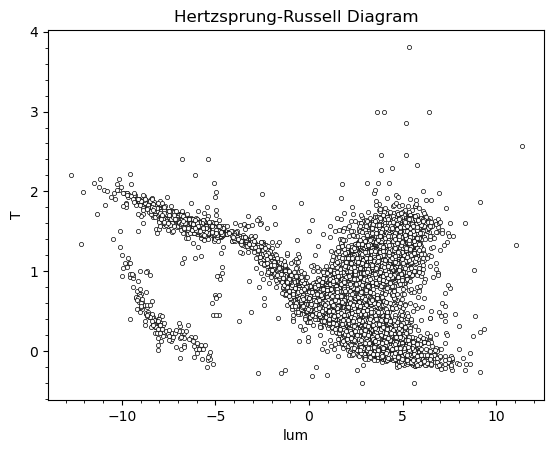

In [10]:
plt.scatter(lum, ci, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.xlabel('lum')
plt.ylabel('T')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.show()

In [7]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)

In [8]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]

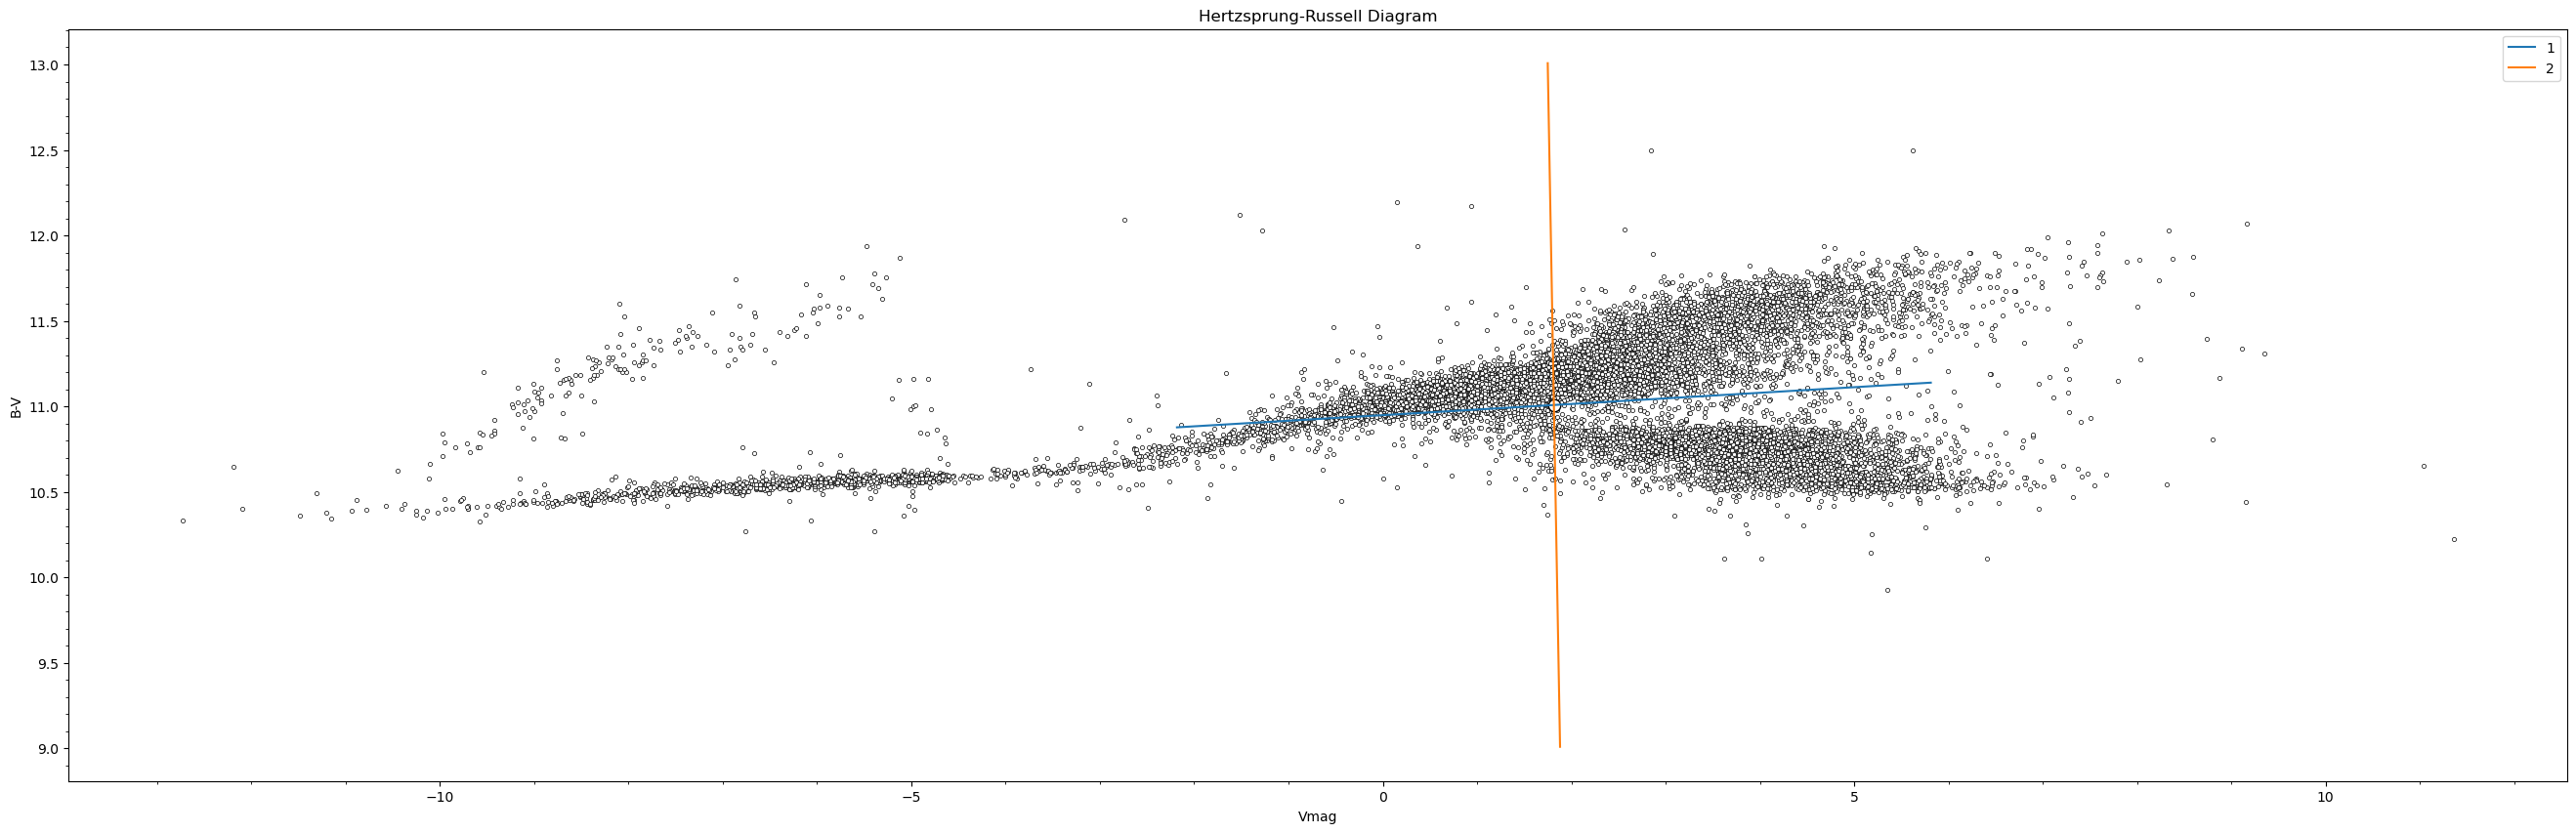

In [16]:
plt.figure(figsize=(33,10))
plt.scatter(lum, T, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], label='1')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]], label='2')
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
# plt.xlim(0,13)
# plt.ylim(-2,3)
plt.legend()
plt.show()

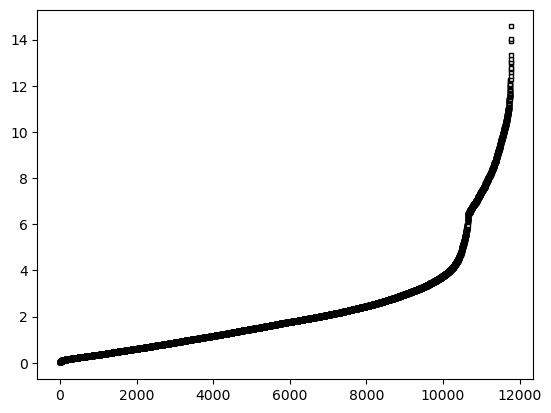

[ 1.81506922 11.00838929]


In [17]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3, color='w', markeredgecolor='k')
plt.show()
print(c0)

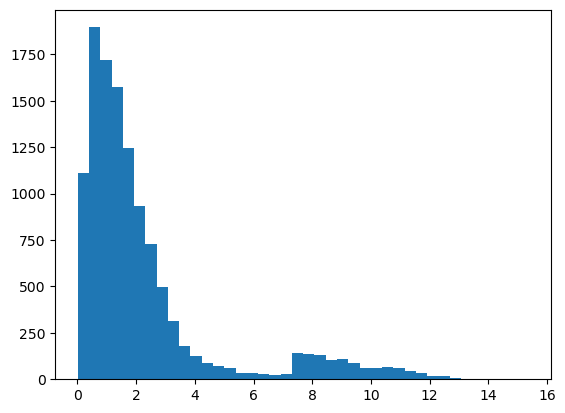

[ 2.62832923 11.05950769]


In [67]:
# N = len(X0)
# alpha = (N - 8) / N
# print(alpha)
alpha=0.5
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
c = pca.robust_location(X0, wma)
plt.hist(pca.distance_center(X0, c), bins=40)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

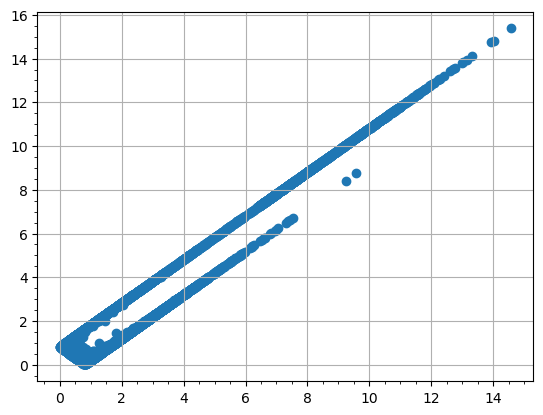

In [68]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


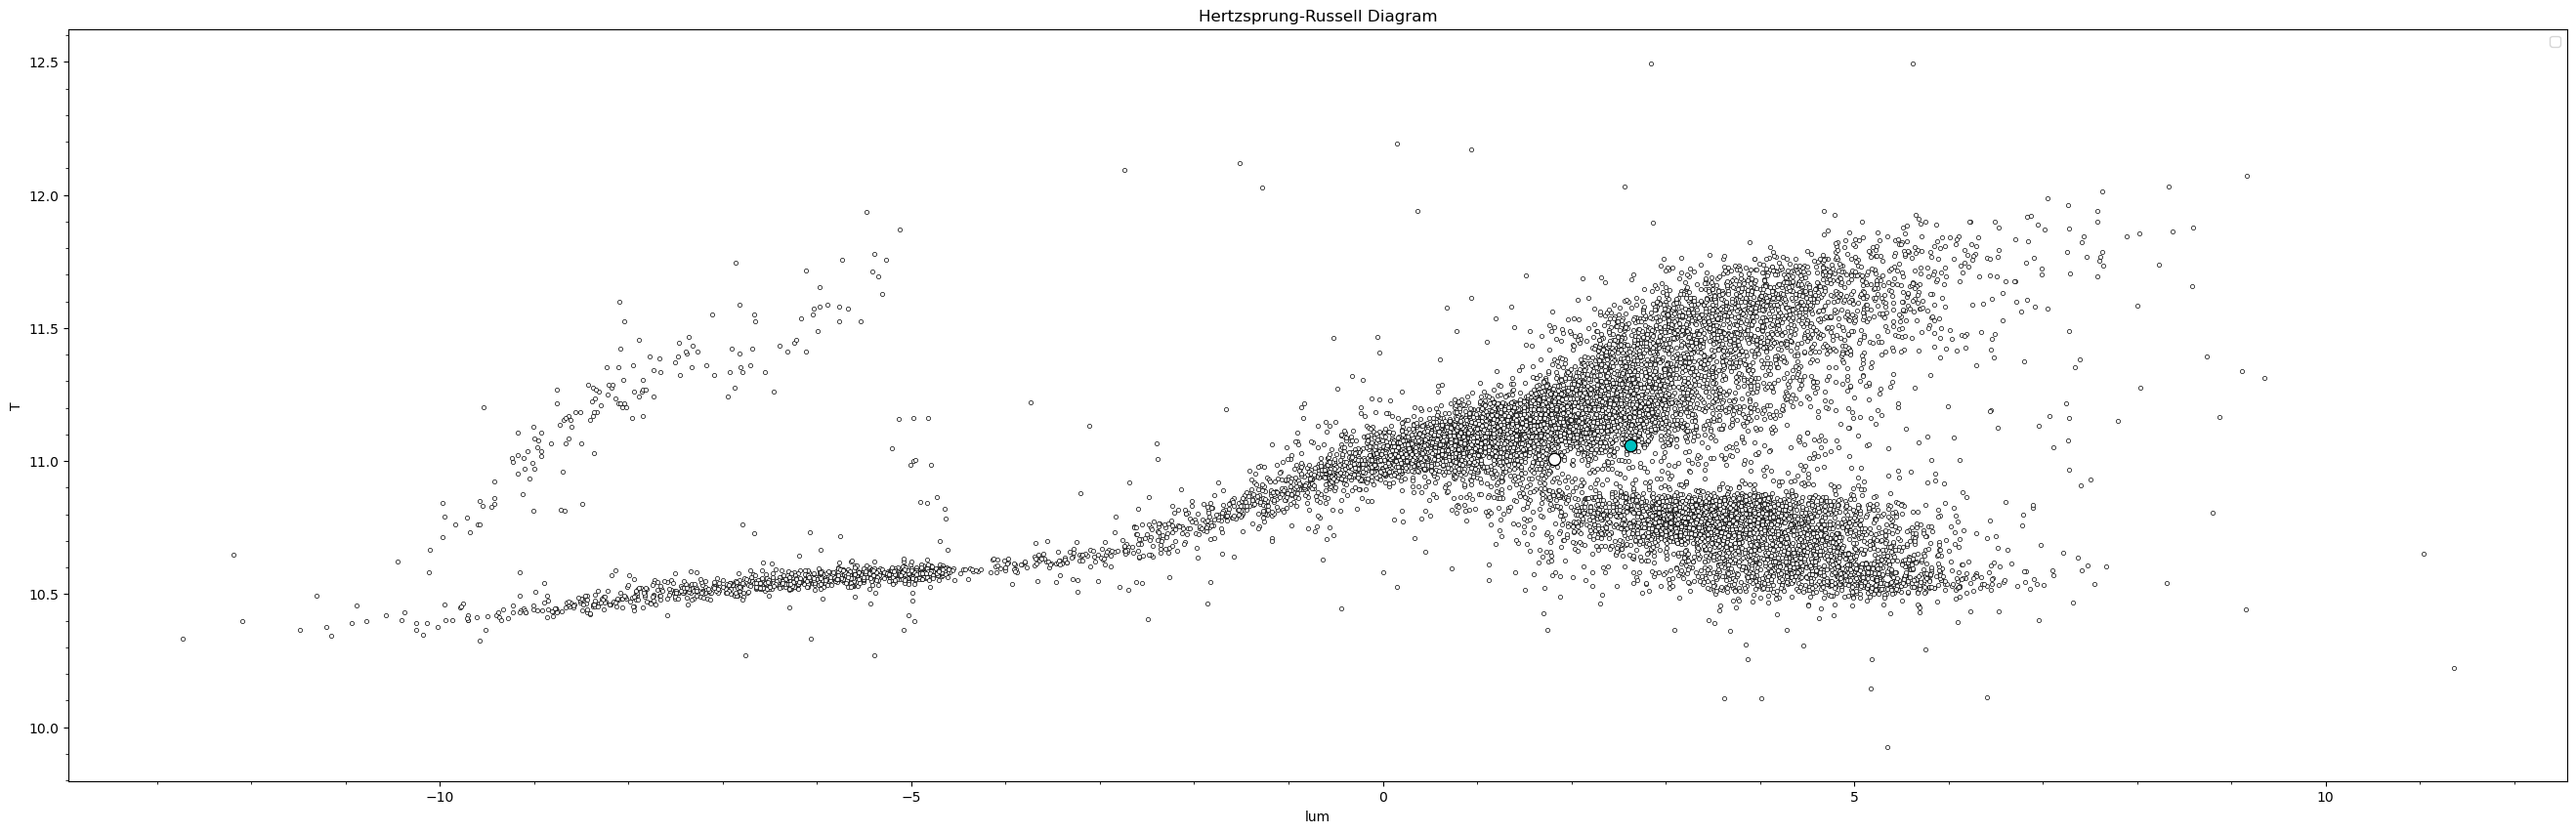

In [69]:
plt.figure(figsize=(33,10))
plt.scatter(lum, T, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='c', edgecolors='k')
plt.xlabel('lum')
plt.ylabel('T')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
# plt.xlim(0,13)
# plt.ylim(-2,3)
plt.legend()
plt.show()

In [70]:
X1 = X0 - c
X1_0 = X0 - c0

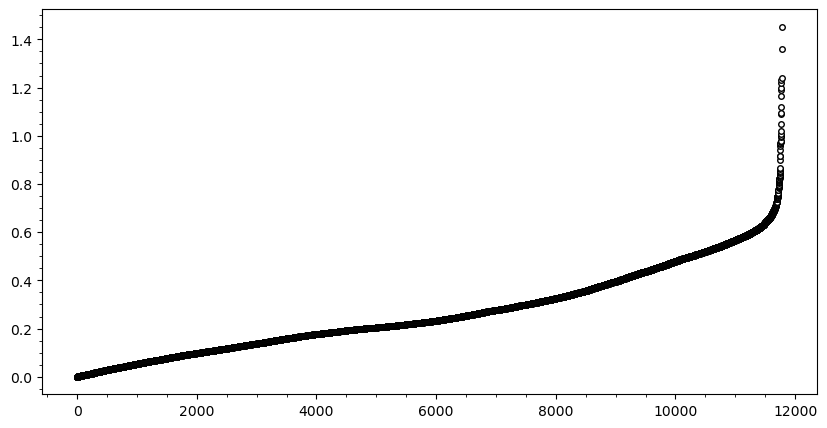

10.816230265123357 [0.99946616 0.03267088]


In [71]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,5))
# plt.hist(pca.distance_line(X1_0, a1_0), bins=50, rwidth=0.9)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, color='w', markeredgecolor='k')
plt.minorticks_on()
plt.show()
print(L1_0, a1_0)

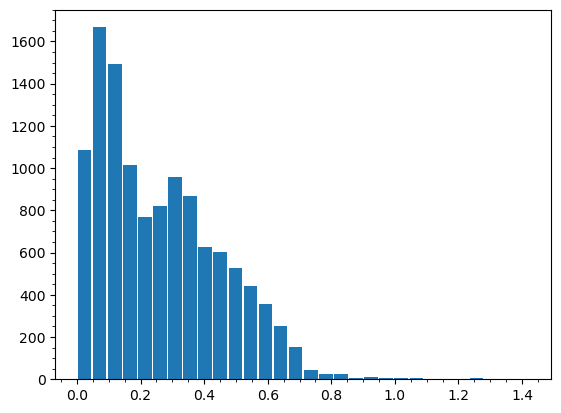

10.101644716298805 [0.99877102 0.04956266]


In [72]:
# N = len(X0)
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a1, L1 = pca.find_robust_pc(X1, wma)

plt.hist(pca.distance_line(X1, a1), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.minorticks_on()
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

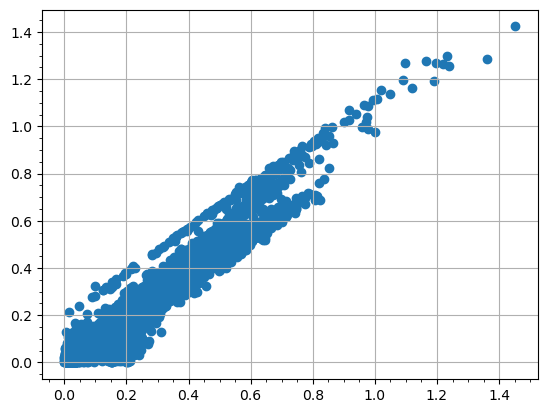

In [73]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [74]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

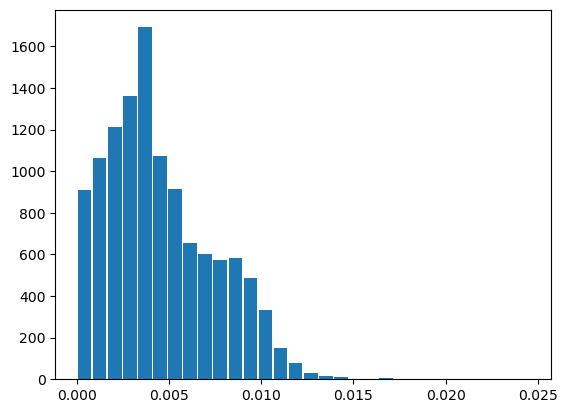

0.1058006318303259 [-0.04956266  0.99877102]


In [75]:
a2_0, L2_0 = pca.find_pc(X2)
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

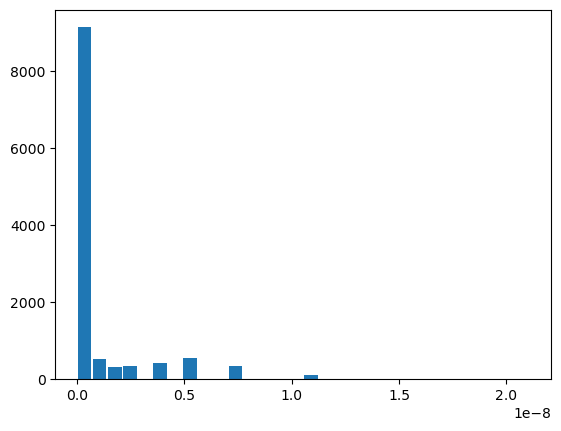

0.06856040584121872 [-0.04956266  0.99877102]


In [76]:
# N = len(X0)
# alpha = (N - 10) / N
# print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a2, L2 = pca.find_robust_pc(X2, wma)
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

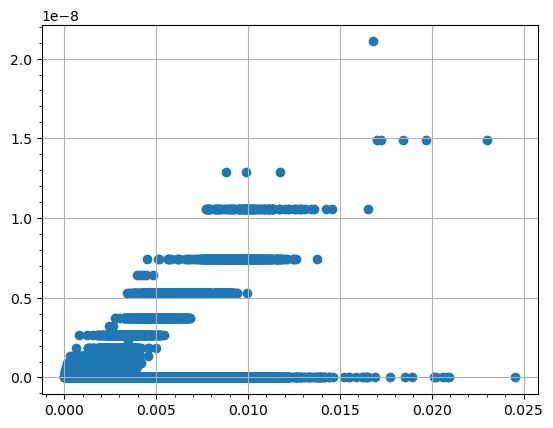

In [77]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

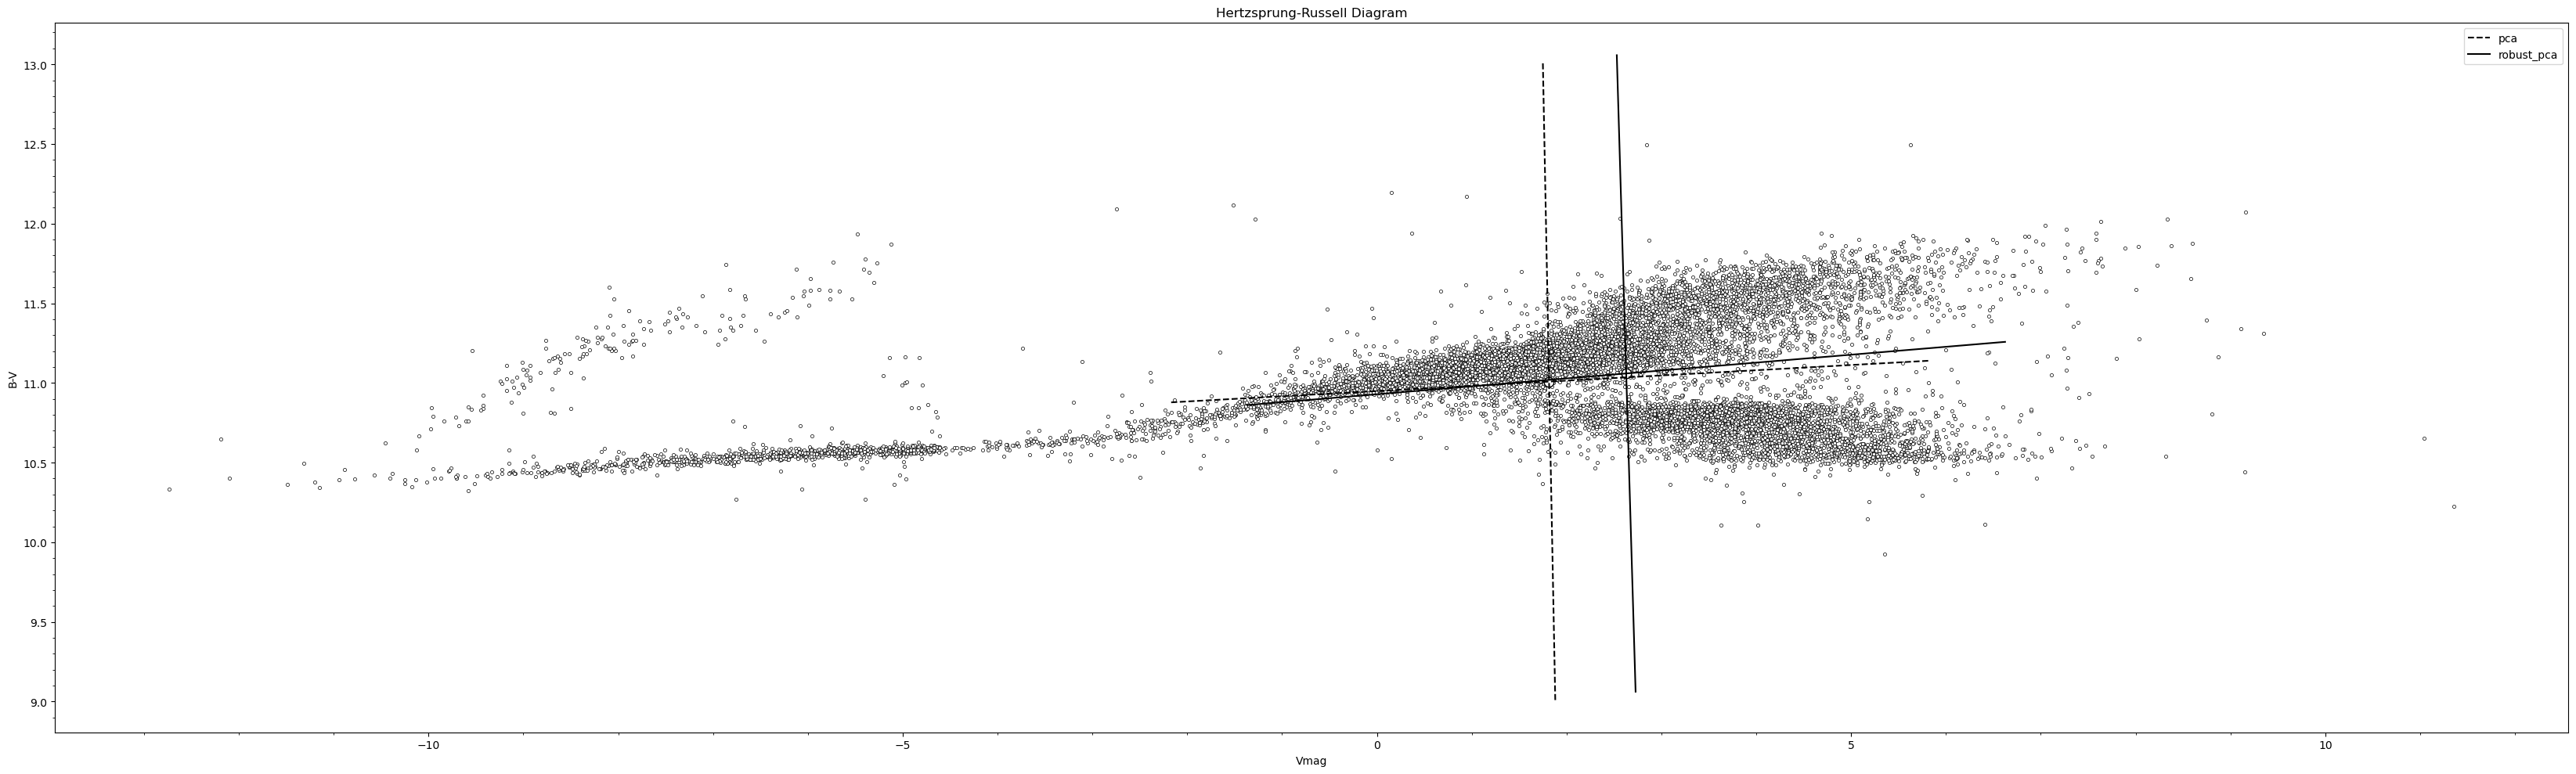

In [78]:
plt.figure(figsize=(33,10))
plt.scatter(lum, T, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
# plt.xlim(0,13)
# plt.ylim(-2,3)
plt.legend()
plt.tight_layout()
# plt.savefig('fig/robust_pca_HIP_star.eps')
plt.show()

In [21]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [22]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.95, 0.001))
S = pca.robust_scatter_matrix(X1, wma)
print(S)

[[ 0.49458597 -2.38702108]
 [-2.38702108 13.54237703]] 0.5052420657207114
[[ 0.44696265 -2.15670428]
 [-2.15670428 12.64394995]] 0.49805397974489957
K: 99
[[ 0.44696265 -2.15670428]
 [-2.15670428 12.64394995]]


In [23]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[-0.98559164  0.16914229]
 [-0.16914229 -0.98559164]]


8.326672684688674e-17

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


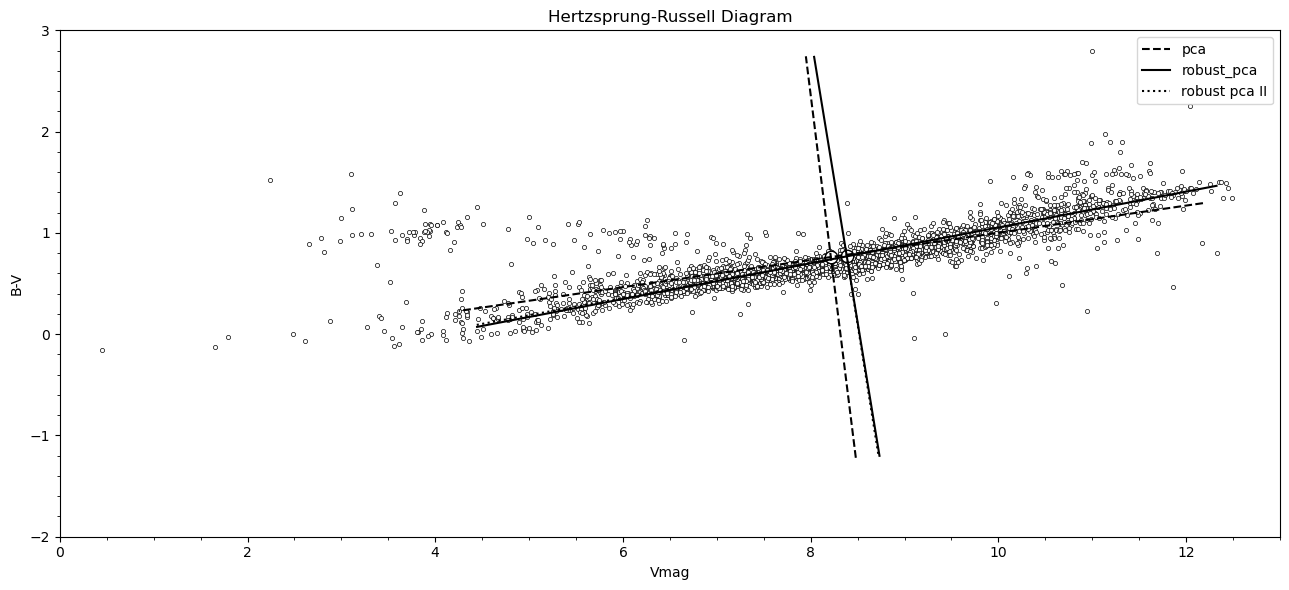

In [24]:
plt.figure(figsize=(13,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.plot([c[0]+4*A[0,0], c[0], c[0]+2*A[0,1]], [c[1]+4*A[1,0], c[1], c[1]+2*A[1,1]], 
         c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.tight_layout()
plt.savefig('fig/robust_pca_HIP_star_1.eps')
plt.show()